# Introduction
In Part I, we downloaded and (hopefully) took some time to read the publication. We also spent some time cleaning the dataset and made sure that it was in an acceptable form.

In this Part, here's what we're gonna do:
1. Import pandas and plotting libraries
2. Split our main DataFrame into a numerical and a categorical DataFrame
3. Perform univariate analysis on each
4. Perform bivariate analysis based on hypotheses made
5. Generate a correlation matrix using the two DataFrames

Useful readings on visualization: 
<a href = "https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed">Introduction to Data Visualization in Python</a> (run it in Incognito Mode if you face the paywall)

It's quite comprehensive and a useful guide for this Part if you're new to visualization.

### Step 1: Import the following libraries
- pandas
- matplotlib.pyplot as plt
- seaborn as sns

In [ ]:
# Step 1: Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Read the CSV from Part I
Let's read the CSV you got from the DataFrame at the end of Part I. 

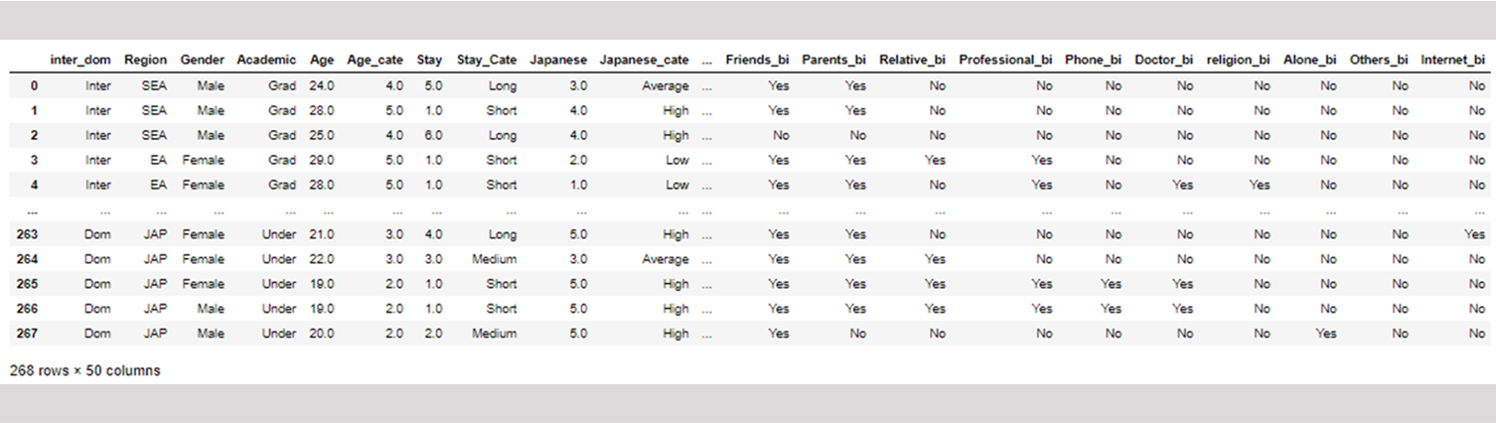

We expect:
1. 268 rows
2. 50 columns

In [ ]:
# Step 2: Read the CSV from Part I

In [2]:
df=pd.read_csv("Cleaned_File.csv")

### Step 3: Check the types of data in each column
From the get-go, we can see that we have both categorical and numerical data. 

Before we start analyzing them, let's take a look at what kind of data we can find in each column with the .dtypes attribute. 

In [ ]:
# Step 3: Use dtypes to check out the type of data is found in each column

In [3]:
df.dtypes

Unnamed: 0           int64
inter_dom           object
Region              object
Gender              object
Academic            object
Age                float64
Age_cate           float64
Stay               float64
Stay_Cate           object
Japanese           float64
Japanese_cate       object
English            float64
English_cate        object
Intimate            object
Religion            object
Suicide             object
Dep                 object
DepType             object
ToDep              float64
DepSev              object
ToSC               float64
APD                float64
AHome              float64
APH                float64
Afear              float64
ACS                float64
AGuilt             float64
AMiscell           float64
ToAS               float64
Partner            float64
Friends            float64
Parents            float64
Relative           float64
Profess            float64
 Phone             float64
Doctor             float64
Reli               float64
A

### Step 4: Split main DataFrame into two separate ones
Since there are many columns and we have two kinds of data types in all columns, we can consider splitting the DataFrame into two separate DataFrames:
1. with only dtype of float64 (float)
2. with only dtype of object (string)

This is what you'd expect from the DataFrame that contains only float:

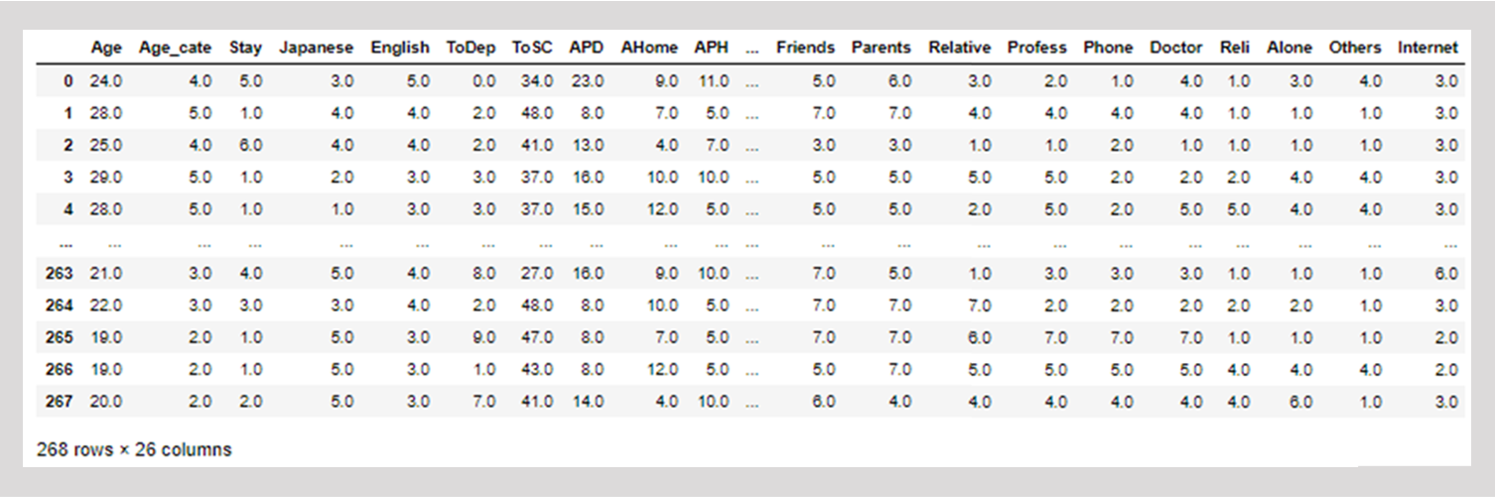

<strong>Hint: Google "select only numeric columns pandas"</strong>

In [ ]:
# Step 4a: Get your float-only DataFrame

In [5]:
df_numeric=df.select_dtypes(include='float64')

In [6]:
df_numeric

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,...,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,3.0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,...,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,...,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,...,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,...,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,3.0,4.0,5.0,4.0,8.0,27.0,16.0,9.0,10.0,...,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0
264,22.0,3.0,3.0,3.0,4.0,2.0,48.0,8.0,10.0,5.0,...,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
265,19.0,2.0,1.0,5.0,3.0,9.0,47.0,8.0,7.0,5.0,...,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0
266,19.0,2.0,1.0,5.0,3.0,1.0,43.0,8.0,12.0,5.0,...,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0


In [ ]:
# Step 4b: Get your object-only DataFrame

In [7]:
df_object=df.select_dtypes(include='object')

In [8]:
df_object

,inter_dom,Region,Gender,Academic,Stay_Cate,Japanese_cate,English_cate,Intimate,Religion,Suicide,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,Long,Average,High,NaN,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,Short,High,High,NaN,No,No,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,Long,High,High,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,Short,Low,Average,No,No,No,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,Short,Low,Average,Yes,No,No,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,Long,High,High,No,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,Medium,Average,High,Yes,Yes,No,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


## Univariate analysis 
Univariate analysis is a form of analysis where we analyze the values in one column, e.g., distribution. 

With columns with numerical variables, we'll use a histogram. On the other hand, for columns with categorical values, we can use a countplot from seaborn, i.e. a plot that counts the frequency of the categorical values in each column. 

There are a lot of columns in the DataFrame that we're working with, and everything seems interesting. We will use a for loop to loop through all the columns to plot the values in them.

<strong>Hint: Google "Use a loop to plot n charts Python</strong>

### Step 5: Plot numeric column values iteratively
Using a for loop, plot histograms using the column values in the first DataFrame from Step 4a.

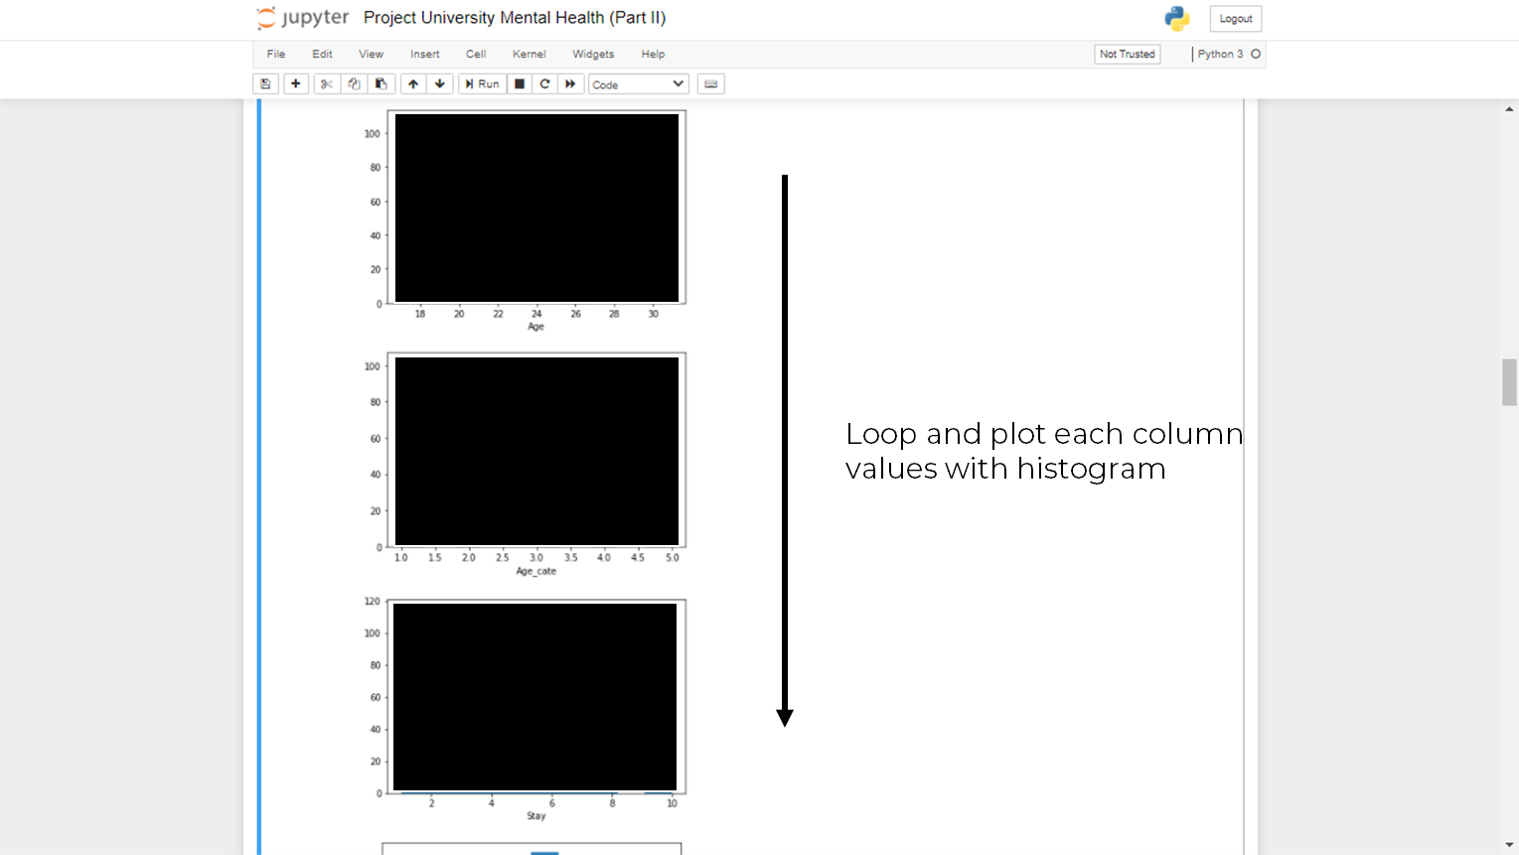

You will see something like this. 

<strong>Hint: Don't forget to use a .show() at the end of the for loop so you show the plots individually.</strong>

In [ ]:
# Step 5: Plot the numeric column values iteratively

<Figure size 864x360 with 0 Axes>

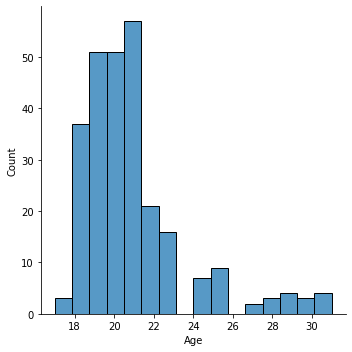

<Figure size 864x360 with 0 Axes>

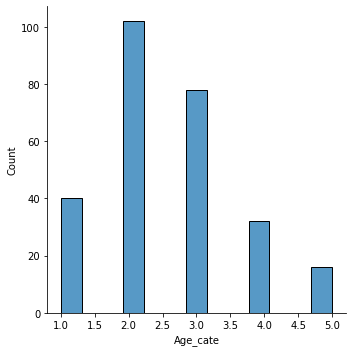

<Figure size 864x360 with 0 Axes>

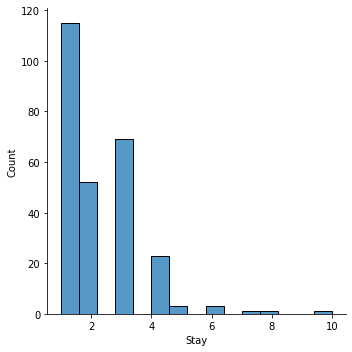

<Figure size 864x360 with 0 Axes>

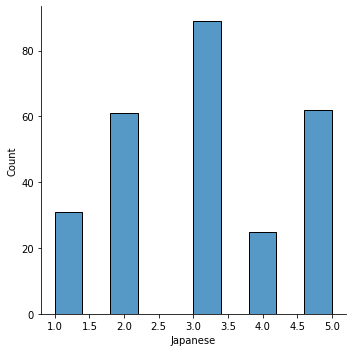

<Figure size 864x360 with 0 Axes>

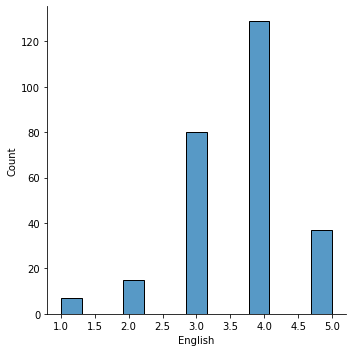

<Figure size 864x360 with 0 Axes>

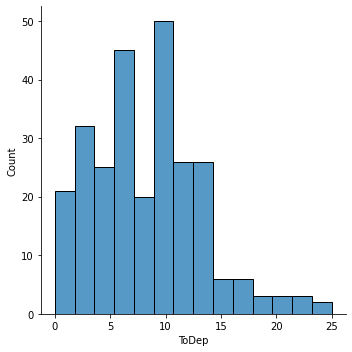

<Figure size 864x360 with 0 Axes>

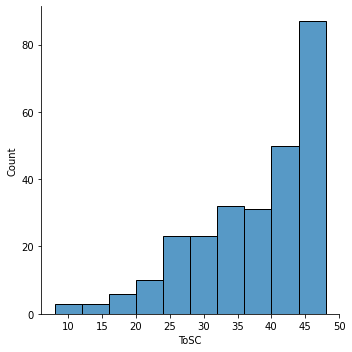

<Figure size 864x360 with 0 Axes>

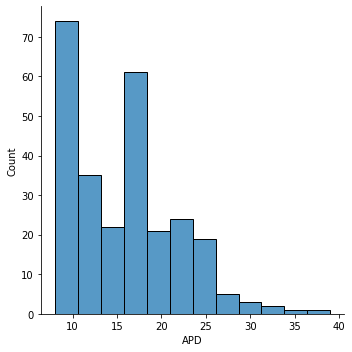

<Figure size 864x360 with 0 Axes>

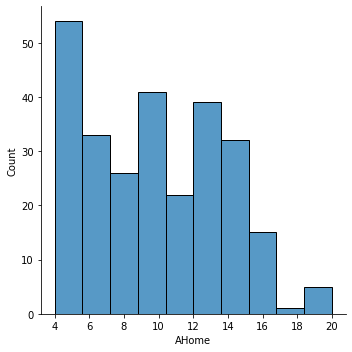

<Figure size 864x360 with 0 Axes>

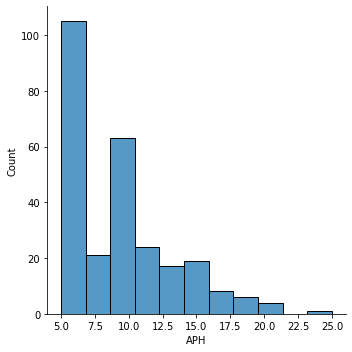

<Figure size 864x360 with 0 Axes>

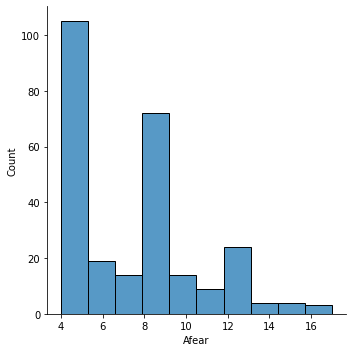

<Figure size 864x360 with 0 Axes>

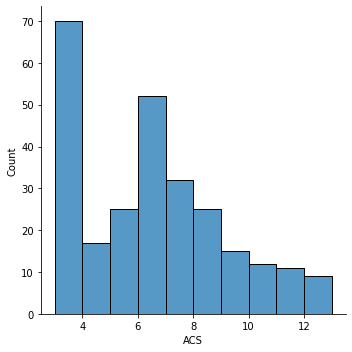

<Figure size 864x360 with 0 Axes>

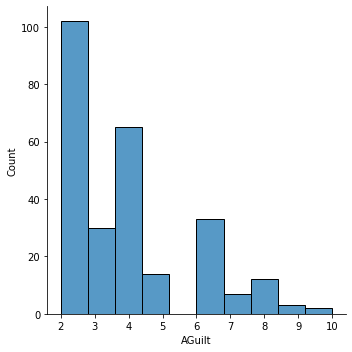

<Figure size 864x360 with 0 Axes>

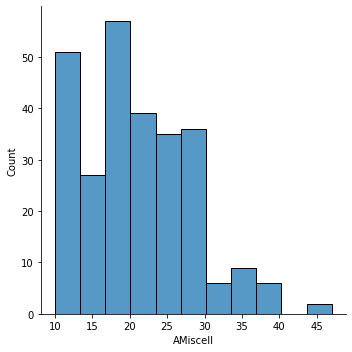

<Figure size 864x360 with 0 Axes>

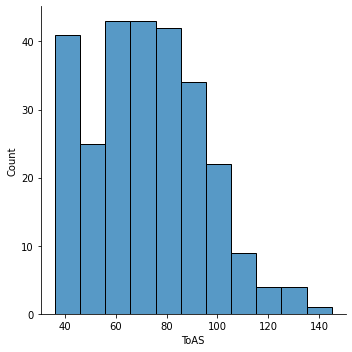

<Figure size 864x360 with 0 Axes>

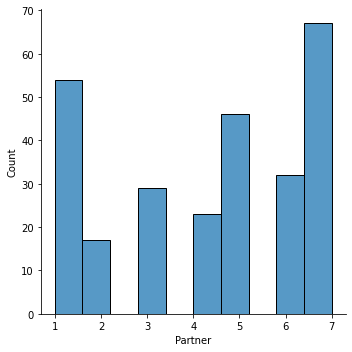

<Figure size 864x360 with 0 Axes>

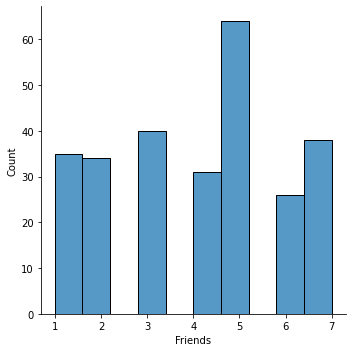

<Figure size 864x360 with 0 Axes>

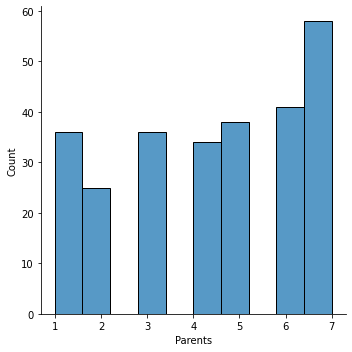

<Figure size 864x360 with 0 Axes>

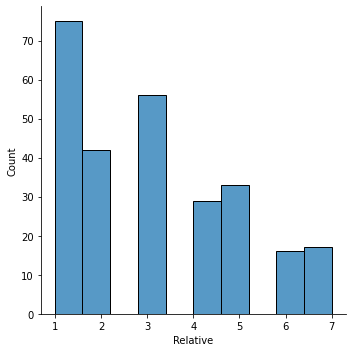

<Figure size 864x360 with 0 Axes>

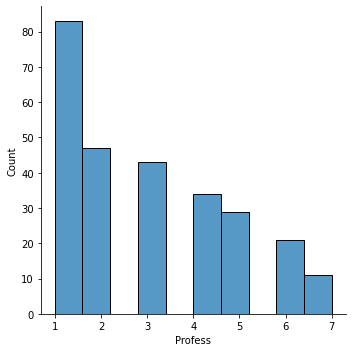

<Figure size 864x360 with 0 Axes>

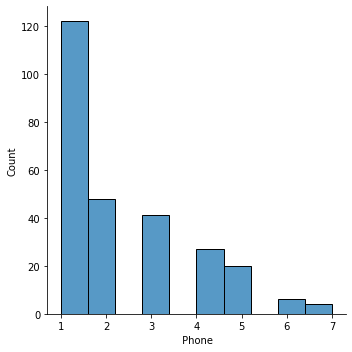

<Figure size 864x360 with 0 Axes>

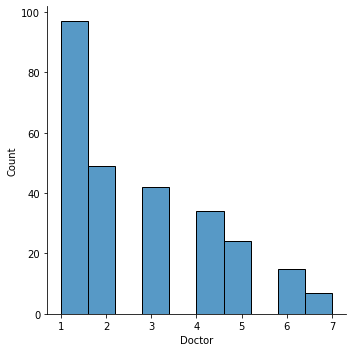

<Figure size 864x360 with 0 Axes>

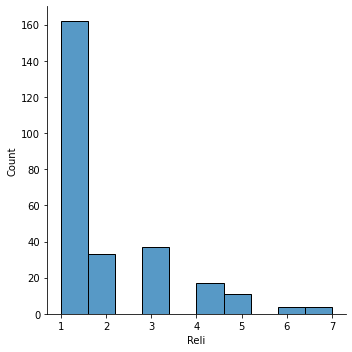

<Figure size 864x360 with 0 Axes>

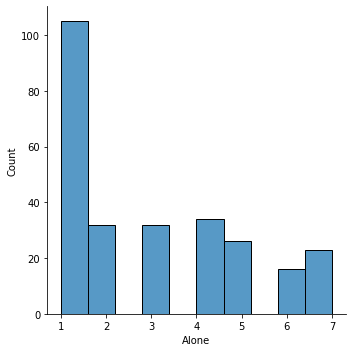

<Figure size 864x360 with 0 Axes>

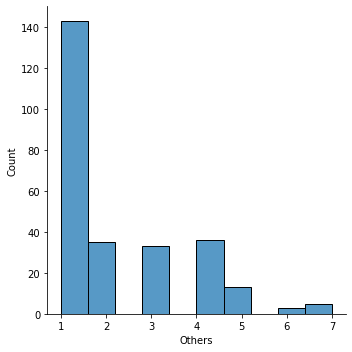

<Figure size 864x360 with 0 Axes>

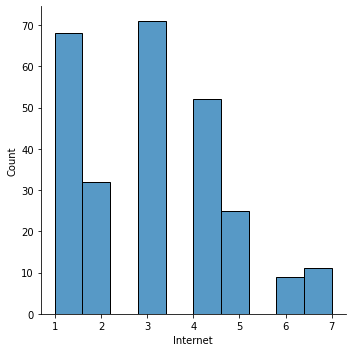

In [16]:
for i in df_numeric.columns:
    plt.figure(figsize=(12,5))
    sns.displot(data=df_numeric[i])
    plt.show()

### Step 6: Plot categorical columns iteratively with countplot
After we're done with the numerical columns, let's plot the categorical values with a countplot. Countplots, as the name implies, is a plot that counts the frequency of the categories in the column.

Similar to Step 5, use a for loop and loop through the columns to plot countplots - seaborn has a convenient method for that. 

In [ ]:
# Step 6: Plot the categorical column values iteratively

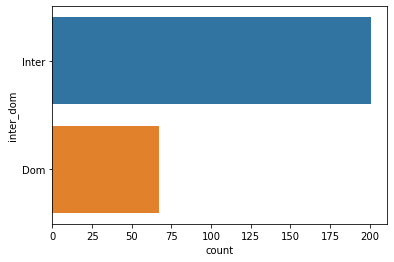

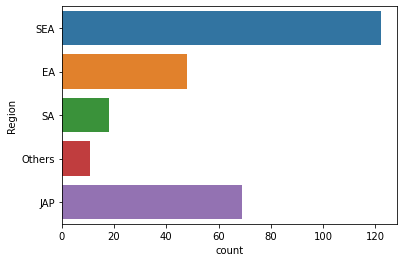

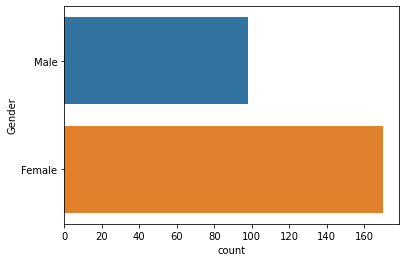

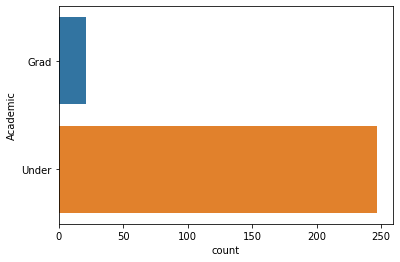

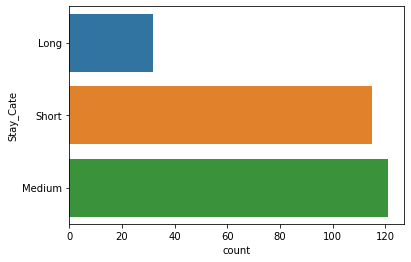

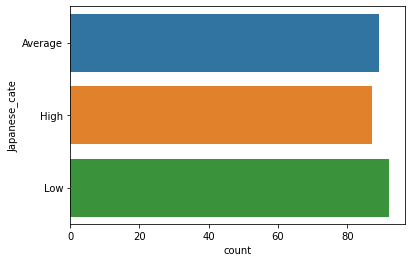

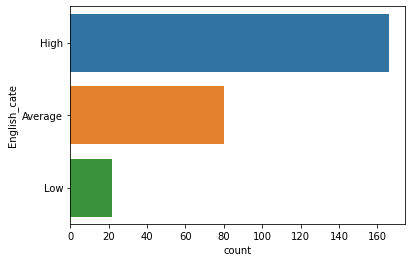

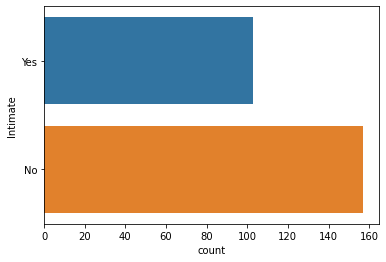

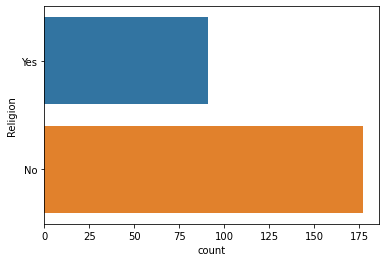

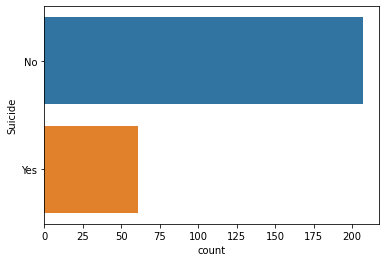

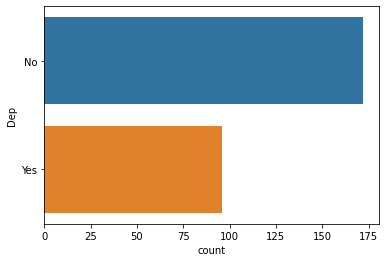

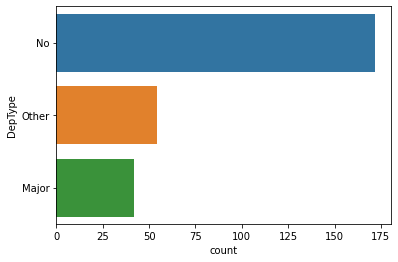

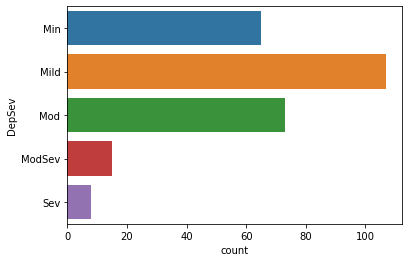

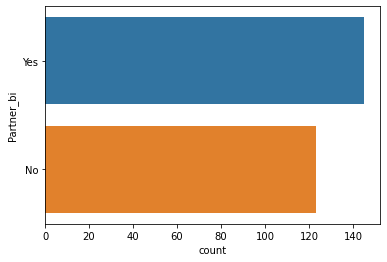

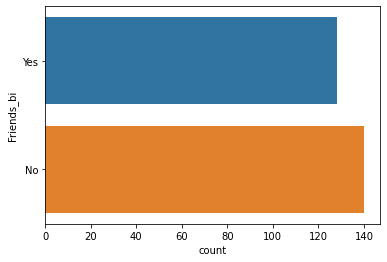

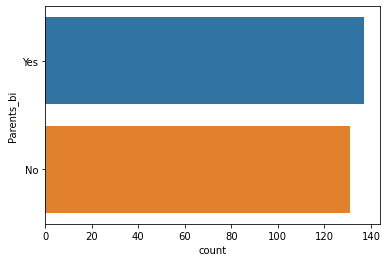

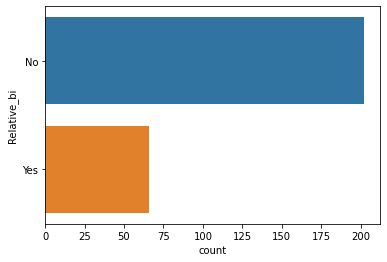

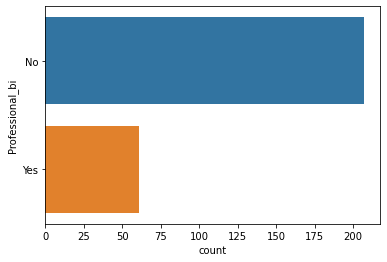

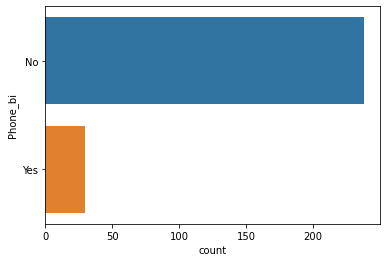

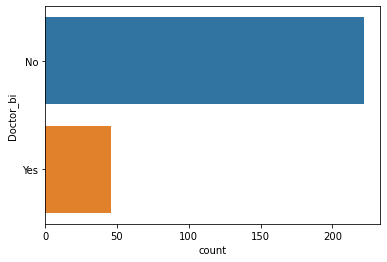

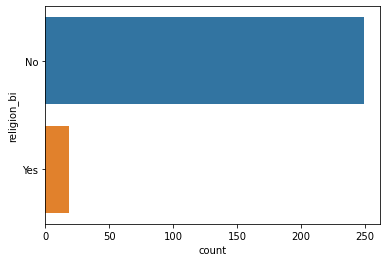

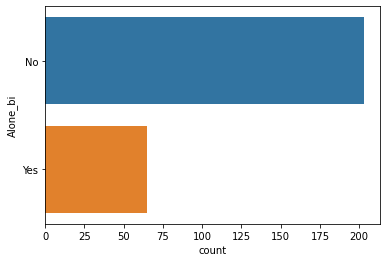

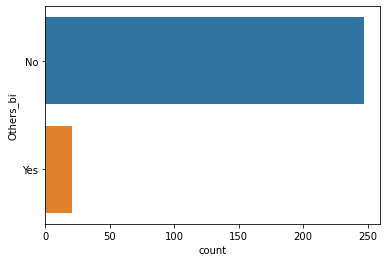

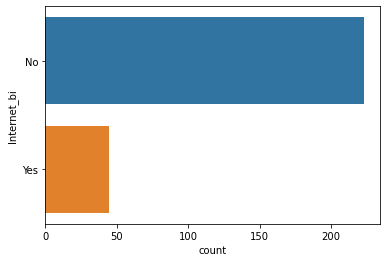

In [25]:
object_bol = df.dtypes == 'object'
object_bol
for catplot in df_object.columns:
    sns.countplot(y=catplot,data=df_object)
    plt.show()
    
   

## Bivariate analysis
We hope you spent time pondering over the univariate analysis performed. In this section, we will perform bivariate analysis, or the analysis between two variables. 

The aim of bivariate analysis (BA) is to investigate the relationship and correlation between the variables. 

We will use three kinds of plotting:
1. numerical variable vs categorical variable = boxplot
2. numerical variable vs numerical variable = scatterplot
3. categorical variable vs categorical variable = contingency table

We will focus on a few variables (feel free to explore more later):
- ToDep (Whether students have suicidal Ideation in the last 2 weeks or not (based on a question in PHQ-9))
- Suicide (Total score of depression measured by PHQ-9)

<font color = 'red'>Make sure you read the article that we recommended in Part I so you can fully appreciate the context of the analysis that you're doing.</font>

### Step 7: Obtain a correlation matrix
A correlation matrix is a <em>m</em> x <em>m</em> matrix that contains the correlation score between the column values, where <em>m</em> is the number of numeric columns in the DataFrame. 

You can either go for a numerical matrix which you can use .corr() method for, or you can visualize the correlation with a heatmap - colors are nice. 

Both are fine, as long as you get to visualize the relationship between your columns. 

<strong>Hint: Google "python correlation matrix"</strong>

<strong>Hint 2: Plot's too crowded? Use plt.figure to change the figure size.</strong>

In [ ]:
# Step 7: Get the correlation matrix of your DataFrame

In [26]:
df_numeric.corr()

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
Age,1.000000,0.932391,0.302234,-0.133461,0.050873,-0.115263,0.110462,0.057490,-0.022056,-0.013014,...,-0.054481,-0.021119,-0.025270,0.046816,-0.026765,0.047261,0.135979,-0.137415,-0.001961,-0.001132
Age_cate,0.932391,1.000000,0.420833,-0.047012,0.085859,-0.075536,0.085966,0.076982,-0.070844,-0.029781,...,-0.062392,-0.035399,-0.065354,0.024549,-0.045956,0.053559,0.105242,-0.136169,-0.000625,-0.005991
Stay,0.302234,0.420833,1.000000,0.307155,-0.015933,0.051581,-0.037587,0.059174,-0.123386,0.021856,...,0.019637,-0.021692,-0.069792,-0.039987,-0.067336,-0.011302,-0.023514,-0.117616,0.000616,-0.004744
Japanese,-0.133461,-0.047012,0.307155,1.000000,-0.308978,0.036548,0.042755,-0.173587,-0.290113,-0.151483,...,0.110171,0.154005,0.000242,0.063271,0.137827,0.092873,-0.038463,-0.191265,-0.069909,-0.076312
English,0.050873,0.085859,-0.015933,-0.308978,1.000000,-0.036452,-0.074368,0.155636,0.075468,0.112530,...,0.035084,-0.028580,0.026761,0.083922,-0.050024,0.062343,0.046218,0.105538,0.108334,0.043609
ToDep,-0.115263,-0.075536,0.051581,0.036548,-0.036452,1.000000,-0.551795,0.340256,0.168587,0.309254,...,-0.115297,-0.170580,-0.146194,0.063483,0.078878,-0.031114,-0.036490,0.309697,0.241072,0.154078
ToSC,0.110462,0.085966,-0.037587,0.042755,-0.074368,-0.551795,1.000000,-0.529497,-0.237953,-0.424246,...,0.126789,0.176851,0.165179,-0.105633,-0.020279,-0.030819,-0.000166,-0.428907,-0.233147,-0.205616
APD,0.057490,0.076982,0.059174,-0.173587,0.155636,0.340256,-0.529497,1.000000,0.371330,0.647512,...,-0.045776,-0.126569,-0.063106,0.141540,0.113840,0.123260,0.185495,0.266036,0.235916,0.242380
AHome,-0.022056,-0.070844,-0.123386,-0.290113,0.075468,0.168587,-0.237953,0.371330,1.000000,0.397227,...,0.086685,0.167689,0.138730,0.127884,0.091044,-0.008428,0.162899,0.110229,0.192904,0.187404
APH,-0.013014,-0.029781,0.021856,-0.151483,0.112530,0.309254,-0.424246,0.647512,0.397227,1.000000,...,-0.115968,-0.108921,-0.059540,0.081489,0.076090,0.066727,0.143493,0.251594,0.228293,0.121476


<AxesSubplot:>

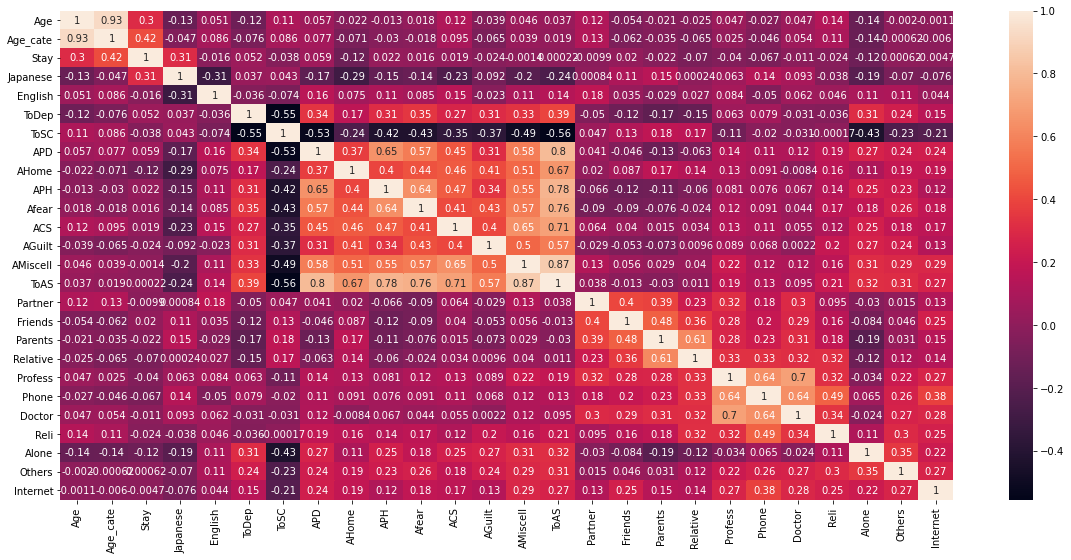

In [29]:
plt.figure(figsize=(20,9))
sns.heatmap(df_numeric.corr(), annot=True)


### Step 8: Perform BA on ToDep vs ToSC with a scatterplot
From the correlation matrix, we see that there's a negative correlation between ToDep and ToSC (Total social connectedness). 

It makes sense since the more socially connected one is, the lower the depression score. 

Plot a scatterplot between the two variables with either matplotlib.pyplot or seaborn. 

In [ ]:
# Step 8: Plot a scatterplot between ToDep vs ToSC 

<AxesSubplot:xlabel='ToDep', ylabel='ToSC'>

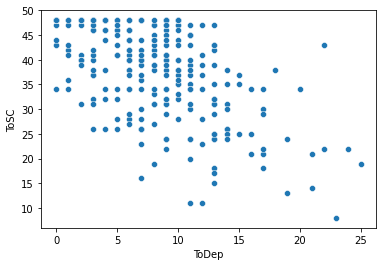

In [30]:
sns.scatterplot(data=df_numeric, x="ToDep", y="ToSC")

### Step 9: Perform BA on ToDep vs APD with a scatterplot
Another interesting correlation that we see is a relatively high score between ToDep and APD (perceived discrimination score). 

We can hypothesize that the more discriminated a student feels, the higher the depression score. 

Plot a scatterplot between the two variables.

In [ ]:
# Step 9: Plot a scatterplot between ToDep and APD

<AxesSubplot:xlabel='ToDep', ylabel='APD'>

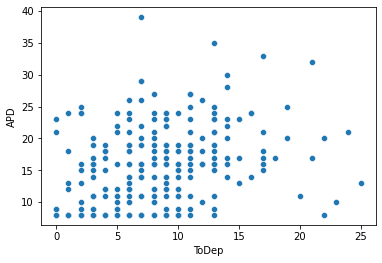

In [31]:
sns.scatterplot(data=df_numeric, x="ToDep", y="APD")

### Step 10: Perform BA on ToDep vs inter_dom with a boxplot
Let's take a look at whether foreign students experience a higher depression score compared to domestic students. 

We can do this using a boxplot. 

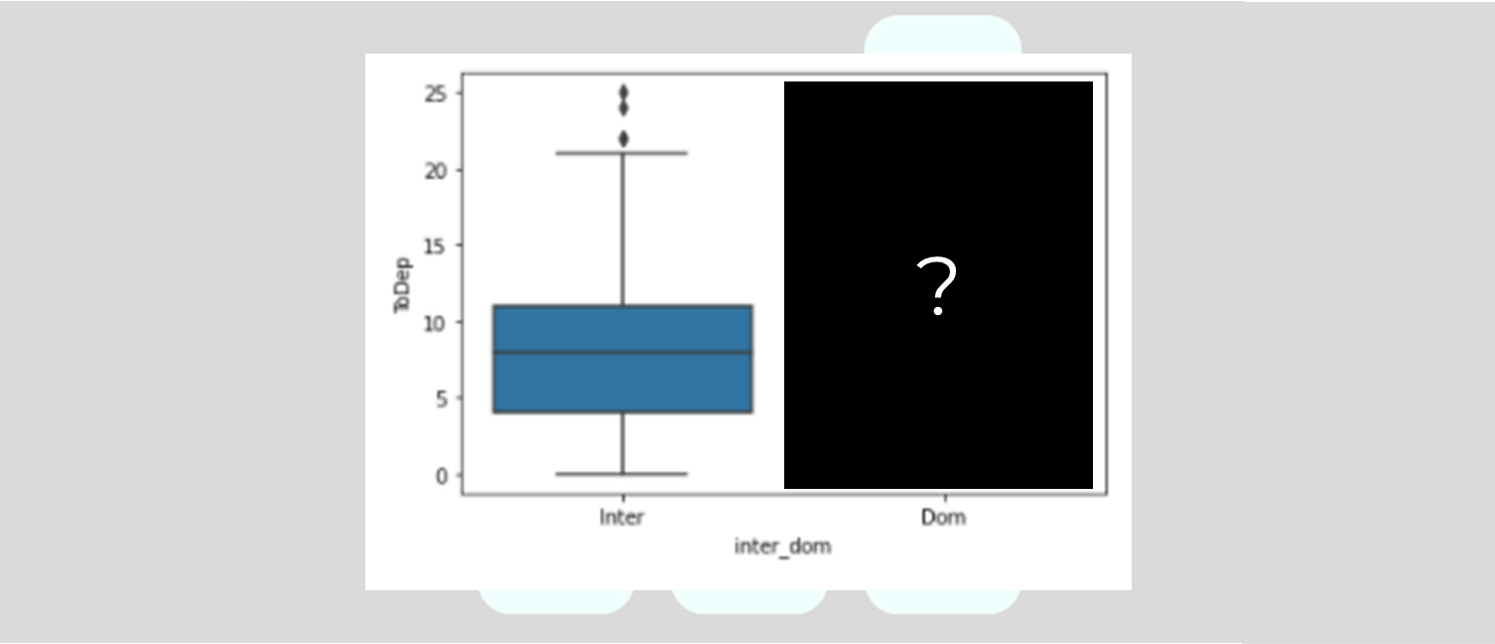

Here's what we'll anticipate when we plot a boxplot with the two categories in 'inter_dom' and the 'ToDep'.

In [ ]:
# Step 10: Plot a boxplot between inter_dom and ToDep

<AxesSubplot:xlabel='inter_dom', ylabel='ToDep'>

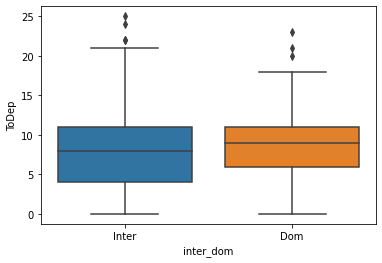

In [33]:
sns.boxplot(x="inter_dom", y="ToDep", data=df)

### Step 11: Perform an independent t-test between Inter and Dom
The boxes in the boxplot do look the same, but how do we tell that it's different? 

In this case, we can use <strong>STATS</strong>. More specicifically, an independent t-test. A t-test helps to determine whether there is a statistically significant difference between the means in two unrelated groups.

<font color = 'red'>Don't fall asleep!</font>

Stats is important, and this is a rare chance to practice your skills since not all UpLevel projects have this component. 

Here's what we need to do:
1. Import ttest_ind from scipy.stats
2. Extract and separate ToDep values from 'Inter' and 'Dom'
3. Use ttest_ind function to compare the two 
4. Assess whether pvalue < 0.05 or >= 0.05

There are a few ways to do point 2 - you can use a single line if you're experienced, three or more if you're not. No worries, as long as you get two separate lists of 'ToDep' from 'Inter' and 'Dom'.

<strong>Hint: Google "get value of one column based on another column pandas"</strong>

In [ ]:
# Step 11a: Import ttest_ind from scipy.stats

# Step 11b: Get a list containing ToDep from 'Inter', and a list containing ToDep from 'Dom'


# Step 11c: Use ttest_ind on the two lists and print the results

In [34]:
from scipy.stats import ttest_ind

In [35]:
Inter=df[df['inter_dom']=="Inter"]['ToDep']

In [36]:
Inter

0       0.0
1       2.0
2       2.0
3       3.0
4       3.0
       ... 
196     6.0
197     7.0
198    16.0
199     8.0
200     2.0
Name: ToDep, Length: 201, dtype: float64

In [37]:
Dom=df[df['inter_dom']=="Dom"]['ToDep']

In [38]:
Dom

201    12.0
202     9.0
203     7.0
204     3.0
205    10.0
       ... 
263     8.0
264     2.0
265     9.0
266     1.0
267     7.0
Name: ToDep, Length: 67, dtype: float64

In [39]:
ttest_ind(Inter,Dom)

Ttest_indResult(statistic=-0.8109206006749218, pvalue=0.41813622602092027)

If you do this right, you'll see that the pvalue is larger than 0.05, which means the means of the two groups are the same.

### Step 12: Perform BA on ToDep vs Suicide with a boxplot
For comparison that's very obvious, let's do ToDep vs Suicide. 

In the dataset, Suicide refers to whether the students as had suicide ideation in the past two weeks.

In [ ]:
# Step 12: Plot boxplot between Suicide and ToDep

<AxesSubplot:xlabel='Suicide', ylabel='ToDep'>

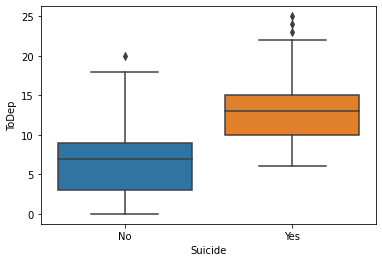

In [40]:
sns.boxplot(x="Suicide", y="ToDep", data=df)

### Step 13: Repeat Step 11 on ToDep vs Suicide
The boxplot result should be very obvious in answering whether there is a difference between suicide ideation and the total depressions score. 

However, for confirmation let's perform another independent t-test between the Yes and No groups. 

In [ ]:
# Step 13: Repeat the t-test

In [41]:
ttest_ind(df[df['Suicide']=="Yes"]['ToDep'],df[df['Suicide']=="No"]['ToDep'])

Ttest_indResult(statistic=10.589085179497475, pvalue=4.290131684472933e-22)

### Step 14: Perform BA on ToDep vs Gender with a boxplot
You got this - plot the boxplot for ToDep vs Gender and then do a t-test.

In [ ]:
# Step 14a: Plot a boxplot on ToDep vs Gender

# Step 14b: Print the results of the t-test of ToDep between Male and Female

<AxesSubplot:xlabel='Gender', ylabel='ToDep'>

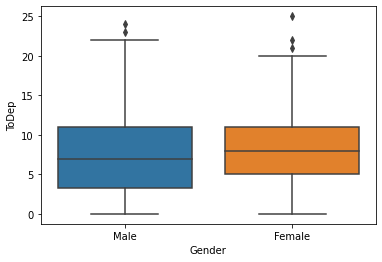

In [42]:
sns.boxplot(x="Gender", y="ToDep", data=df)

In [43]:
ttest_ind(df[df['Gender']=="Male"]['ToDep'],df[df['Gender']=="Female"]['ToDep'])

Ttest_indResult(statistic=-0.9285560600922729, pvalue=0.3539610264273153)

### Step 15: Perform BA on Suicide vs Religion with a contingency table
One of the proposed questions in the article that you can try testing is whether having a religion affects suicide ideation. 

Both 'Religion' and 'Suicide' are categorical values, so let's plot a contingency table first. 

We anticipate to see something like either of these two as the output:

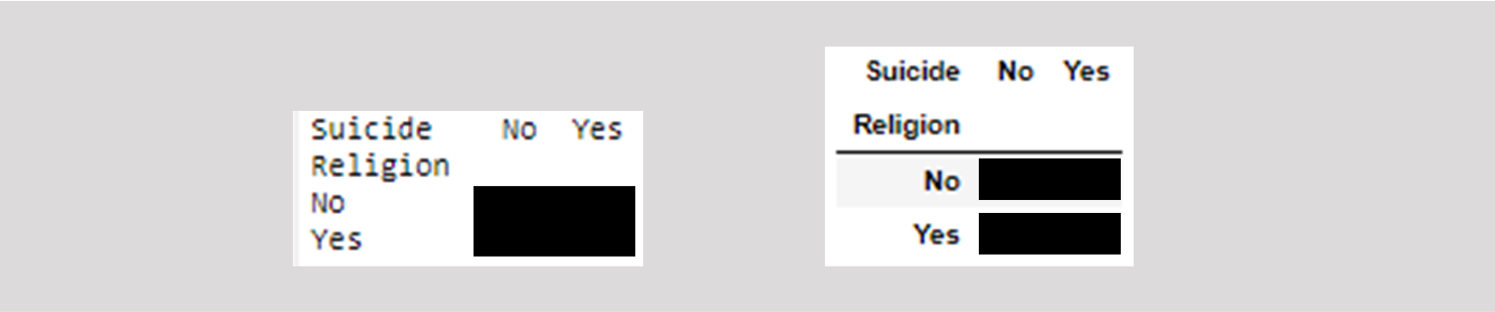

<strong>Hint: Google "create a contingency table python from two columns"</strong>

In [ ]:
# Step 15: Create a contingency table between Religion and Suicide

In [44]:
data_crosstab = pd.crosstab(df['Religion'],  
                            df['Suicide'], 
                                margins = False) 

In [45]:
data_crosstab

Suicide,No,Yes
Religion,,
No,136,41
Yes,71,20


### Step 16: Perform chi-squared test of independence on the contingency table from Step 15

After we get the contingency table, we will perform a chi-squared test of independence between the two variables. 

Here's what you'll need to do:
1. import chi2_contingency from scipy.stats
2. use chi2_contingency as the contingency table from Step 15
3. look at the second item of the results and see if it is < 0.05 or >= 0.05
    - if the value of the second item is < 0.05, the two categorical variables are dependent
    - if the value of the second item is >= 0.05, the two categorical variables are independent

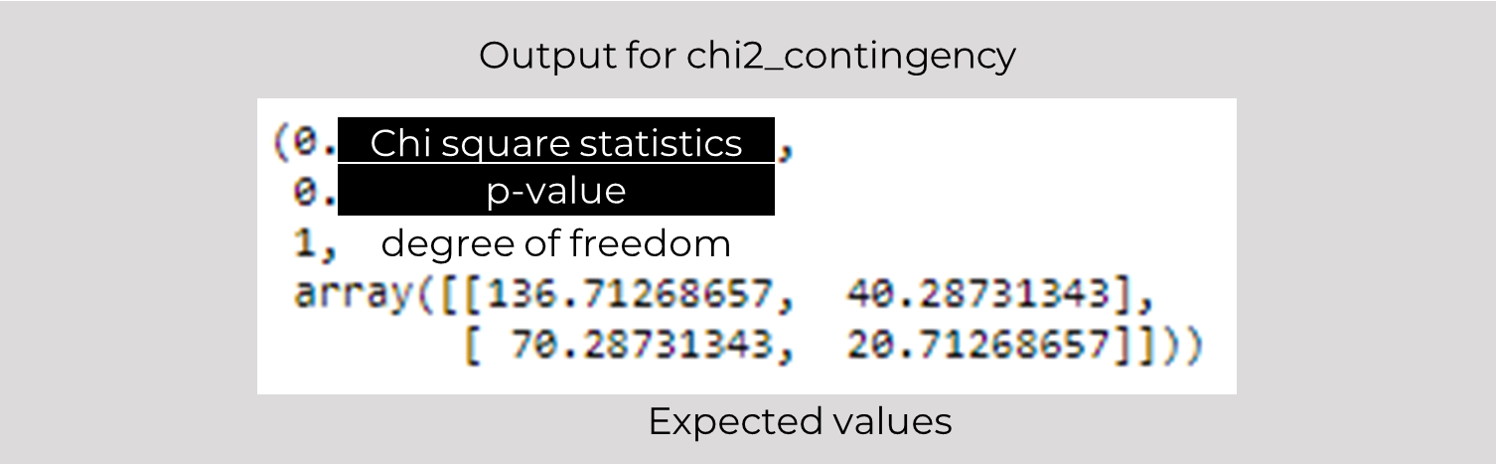

Useful reading: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [ ]:
# Step 16a: Import chi2_contingency from scipy.stats

# Step 16b: Calculate chi-square statistics iwth chi2_contingecy

# Step 16b: Print the results from 16b

In [46]:
from scipy.stats import chi2_contingency

In [47]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [49]:
chi2_contingency(data_crosstab)

(0.004281240904940765,
 0.9478306895469024,
 1,
 array([[136.71268657,  40.28731343],
        [ 70.28731343,  20.71268657]]))

### Step 16: Try more of your own analyses
This is an interesting dataset, so feel free to try a few more analyses like what you did in Steps 15-16. 

Here are a few suggestions that you can try:
1. Intimate vs Suicide - is having a partner in life and suicide ideation independent of each other?
2. Dep vs Suicide - is having depressive symptoms and suicide ideation independent of each other?
3. Alone_bi vs Suicide - is the willingness to solve problems by oneself and suicide ideation indepedent of each other?

In [ ]:
# Step 16: Try different chi-square analyses

In [50]:
data_crosstab_intimate = pd.crosstab(df['Intimate'],  
                            df['Suicide'], 
                                margins = False) 

In [51]:
chi2_contingency(data_crosstab_intimate)

(0.006565250551398621,
 0.9354210895986391,
 1,
 array([[120.76923077,  36.23076923],
        [ 79.23076923,  23.76923077]]))

In [52]:
data_crosstab_intimate

Suicide,No,Yes
Intimate,,
No,121,36
Yes,79,24


In [54]:
data_crosstab_Dep = pd.crosstab(df['Dep'],  
                            df['Suicide'], 
                                margins = False) 

In [55]:
chi2_contingency(data_crosstab_Dep)

(28.75790303846256,
 8.201455806276997e-08,
 1,
 array([[132.85074627,  39.14925373],
        [ 74.14925373,  21.85074627]]))

In [56]:
data_crosstab_Dep

Suicide,No,Yes
Dep,,
No,151,21
Yes,56,40


In [57]:
data_crosstab_Alone_bi = pd.crosstab(df['Alone_bi'],  
                            df['Suicide'], 
                                margins = False) 
chi2_contingency(data_crosstab_Alone_bi)

(15.829028330967525,
 6.933066712472443e-05,
 1,
 array([[156.79477612,  46.20522388],
        [ 50.20522388,  14.79477612]]))

In [58]:
data_crosstab_Alone_bi

Suicide,No,Yes
Alone_bi,,
No,169,34
Yes,38,27


### End of Part II
Hurray, you're done with Part II! In this Part, you performed exploratory data analysis using visualization and statistical testing. 

In the next Part, we will prepare our data for machine learning.